# ONLINE PAYMENT FRAUD DETECTION

A PROJECT DONE BY:
#### AFOLABI, Michael Temitope (MTK AFOLABI)

### CASE STUDY 

Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payment services, headquatered in London

### PROBLEM 

Blossom Bank wants to build a Machine Learning model to predict online payment fraud

### DATA DICTIONARY

THE COLUMN INTERPRETATION

1. step: represents a unit of time where 1 step equals 1 hour 
2. type: type of online transaction
3. amount: the amount of the transaction 
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

In [1]:
#the libraries used

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading of the data set

fd = pd.read_csv('Online Payment Fraud Detection.csv')

In [3]:
#used to view the top rows of the data set

fd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
#used to view the bottom rows of the data set

fd.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [5]:
#used to view the first 30 rows of the data set

fd.head(11)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [6]:
# used to know the shape attribute

fd.shape

(1048575, 10)

In [7]:
fd.shape[0]

1048575

In [8]:
fd.shape[1]

10

In [9]:
#used to get information about the data

fd.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [10]:
#used to view the column of the data

fd.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [11]:
#used to get the statistical summary of the data

fd.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [12]:
fd.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [13]:
#used to check missing data or values

fd.isna().sum() 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [14]:
fd.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False


In [15]:
fd.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False


In [16]:
fd.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [17]:
fd.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [18]:
fd.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [19]:
len(fd.nameDest.unique())

449635

In [20]:
len(fd.nameOrig.unique())

1048317

In [21]:
fd.isFraud

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [22]:
type(fd.isFraud)

pandas.core.series.Series

In [23]:
fd['isFraud']

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [24]:
fd['isFraud'].head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [25]:
fd['isFraud'][3]

1

In [26]:
fd.isFraud[3]

1

In [27]:
fd['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [28]:
#used to check correlations

fd.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


In [29]:
#Used to check correlation

correlation = fd.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
Name: isFraud, dtype: float64


<AxesSubplot:title={'center':'CORRELATION THAT SHOWS RELATIONSHIP BETWEEN EACH COLUMNS'}>

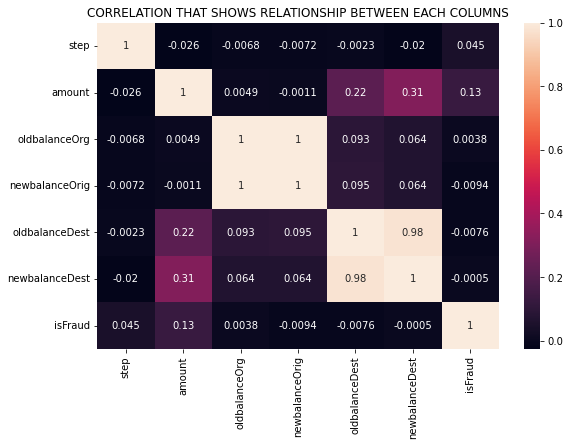

In [30]:
#used to visualize correlation using a seaborn heatmap which shows the relationship bewteen each columns


plt.figure(figsize=(9,6))
plt.title('CORRELATION THAT SHOWS RELATIONSHIP BETWEEN EACH COLUMNS')
sns.heatmap(fd.corr(),annot=True)


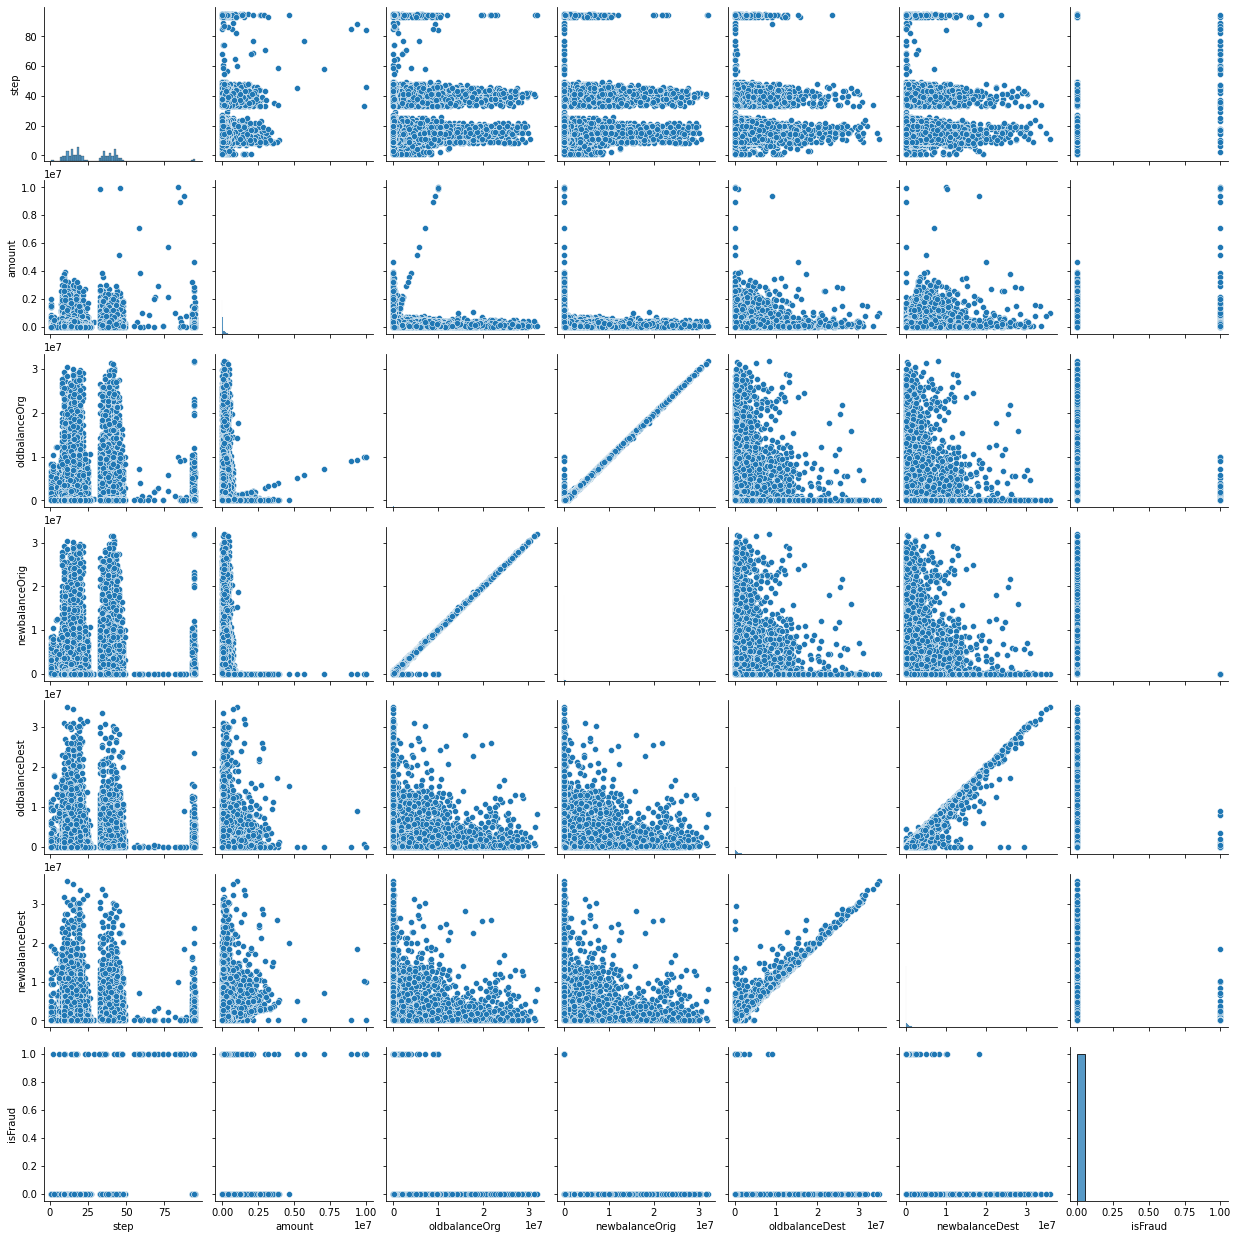

In [31]:
#used to visualize correlation a using seaborn pairplot

sns.pairplot(fd.sample(50000))
plt.show()

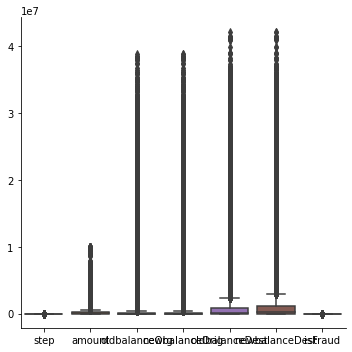

In [32]:
#Used to visualize correlation using catplot

sns.catplot(data=fd,kind='box')

In [33]:
#calculated total amount involved

fd['amount'].sum()

166374223863.37

(-20.0, 100.0)

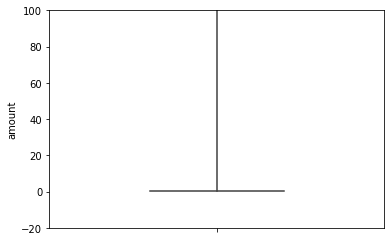

In [34]:
#visual done for the total amount involved

sns.boxplot(y=fd.amount)
plt.ylim(-20,100)

In [35]:
#the average time used

fd['step'].mean()

26.966174093412487

(-50.0, 100.0)

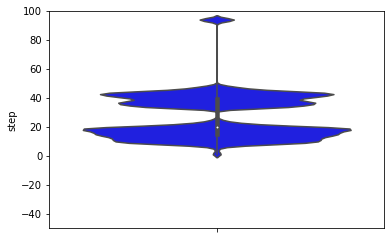

In [36]:
#used to showcase the unit of time

sns.violinplot(y=fd.step, color ='blue')
plt.ylim(-50,100)

In [37]:
#calculated the total number of successful fraud and unsuccessful fraud

print('No of fraud transactions:{}, \n No of non-fraud transactions:{}'.format((fd.isFraud==1).sum(), (fd.isFraud==0).sum()))

No of fraud transactions:1142, 
 No of non-fraud transactions:1047433


In [38]:
fraud=fd.groupby('isFraud').amount.count()
fraud

isFraud
0    1047433
1       1142
Name: amount, dtype: int64

In [39]:
1142/1047433*100 #with the output above, 1142 transactions have been tagged as fraudulent in the dataset, 
                #The output below shows the percentage to be approx. 0.11% of the total number of transactions.

0.10902845337124188

In [40]:
fd['isFraud'].sum() / len(fd)

0.0010890971079798775

<AxesSubplot:xlabel='isFraud', ylabel='count'>

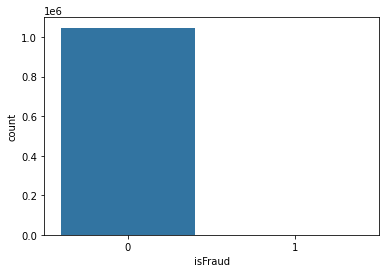

In [41]:
#Checked how balanced the dataset is. It shows unbalanced and 'isFraud' is less than 1% from the chart below

sns.countplot(x='isFraud',data=fd)

<AxesSubplot:xlabel='step', ylabel='Count'>

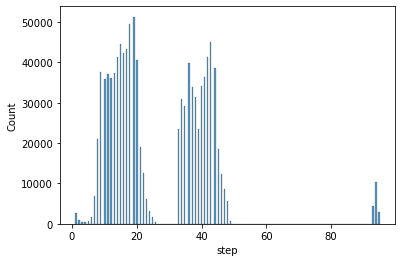

In [42]:
#Checked the distribution of the "step" feature and discovered it is not normally distributed

sns.histplot(data=fd,x='step')

<AxesSubplot:xlabel='amount'>

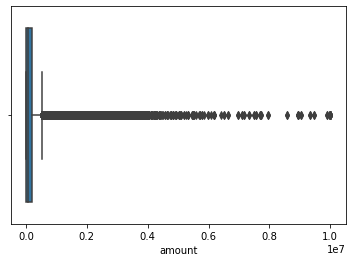

In [43]:
#Checked the amount of column that have outliers and discovred they have a lot of outliers

sns.boxplot(data=fd,x='amount')

<AxesSubplot:xlabel='step'>

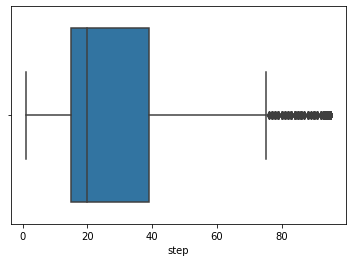

In [44]:
#checked out outliers from the 'step' column

sns.boxplot(data=fd,x='step')

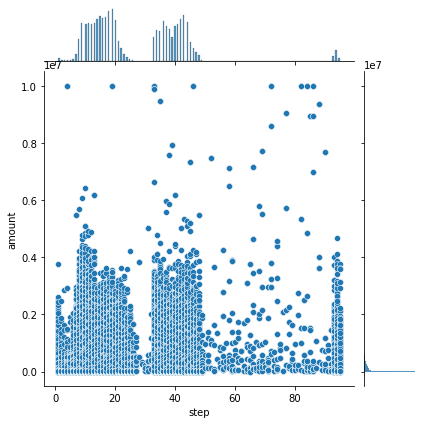

In [45]:
#Ran a joint plot showing the relationship between 'step' and 'amount'

sns.jointplot(x='step',y='amount',data=fd)

In [46]:
#used to list the senders i.e. customers starting the transaction

fd['nameOrig'].head()

0    C1231006815
1    C1666544295
2    C1305486145
3     C840083671
4    C2048537720
Name: nameOrig, dtype: object

In [47]:
#used to list the channels used to defraud i.e. type of online transation

fd['type'].head()

0     PAYMENT
1     PAYMENT
2    TRANSFER
3    CASH_OUT
4     PAYMENT
Name: type, dtype: object

In [48]:
#used to list the receiver of the fraud

fd['nameDest'].head(11)

0     M1979787155
1     M2044282225
2      C553264065
3       C38997010
4     M1230701703
5      M573487274
6      M408069119
7      M633326333
8     M1176932104
9      C195600860
10     C997608398
Name: nameDest, dtype: object

In [49]:
#the output shows the frequency of transaction recipients to be 449,635. 
#some took place more than once while some others is just one.

fd['nameDest'].value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

In [50]:
#used to get the top 5 and the least 5 defrauded customers 

fd.groupby('nameOrig').amount.sum().sort_values(ascending=False)[::]

nameOrig
C538142346     10000000.00
C792651637     10000000.00
C1237313447    10000000.00
C53057884      10000000.00
C1439740840    10000000.00
                  ...     
C402638409            0.30
C2021685600           0.26
C417208094            0.20
C570870355            0.14
C938188576            0.10
Name: amount, Length: 1048317, dtype: float64

In [51]:
#used to get the top 5 defrauded customers

fd.groupby('nameOrig').amount.sum().sort_values(ascending=False)[:5]

nameOrig
C538142346     10000000.0
C792651637     10000000.0
C1237313447    10000000.0
C53057884      10000000.0
C1439740840    10000000.0
Name: amount, dtype: float64

In [52]:
#used to list top 5 defrauded customers and assigned them to a new variable name as top5_customers

top5_customers = fd.groupby('nameOrig').amount.sum().sort_values(ascending=False)[:5]

top5_customers

nameOrig
C538142346     10000000.0
C792651637     10000000.0
C1237313447    10000000.0
C53057884      10000000.0
C1439740840    10000000.0
Name: amount, dtype: float64

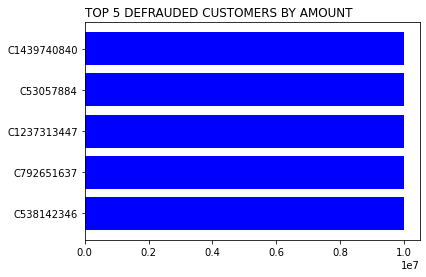

In [53]:
#used the horizontal bar chart to visualize top 5 defrauded customers

#placed the series index on the vertical axis and the series values on the horizontal axis of the barh() plot

plt.title('TOP 5 DEFRAUDED CUSTOMERS BY AMOUNT', loc ='left', )

plt.barh(y=top5_customers.index, width=top5_customers, color='blue')

plt.show()

In [54]:
#calculated the average time used to defraud each customers

fd.groupby('nameOrig').step.mean().sort_values(ascending=False)[::]

nameOrig
C1834358749    95.0
C436398820     95.0
C2049648206    95.0
C74127546      95.0
C1725002049    95.0
               ... 
C722513129      1.0
C1798861270     1.0
C1061018585     1.0
C722417467      1.0
C1108889615     1.0
Name: step, Length: 1048317, dtype: float64

In [55]:
#calculated the online transaction with the highest fraud

fd.groupby('type').isFraud.count().sort_values(ascending=False)[:5]

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: isFraud, dtype: int64

In [56]:
#assigned "type" to the online transaction by the number of transaction

type = fd.groupby('type').isFraud.count().sort_values(ascending=False)[:5]

type

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: isFraud, dtype: int64

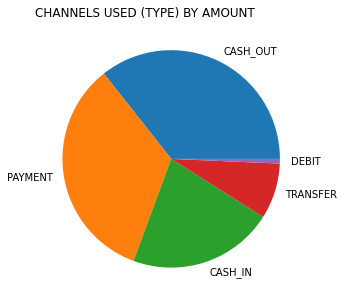

In [57]:
#used pie chart to visualize the transaction type

plt.figure(figsize=(5,5))
plt.pie(type,labels=type.index)

plt.title('CHANNELS USED (TYPE) BY AMOUNT',
             loc ='left', )
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

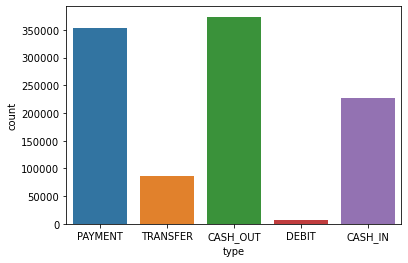

In [58]:
#the mostly used type of transaction

sns.countplot(x='type',data=fd)

Text(0.5, 1.0, 'THE MOSTLY USED TYPE OF TRANSACTION BY TYPE')

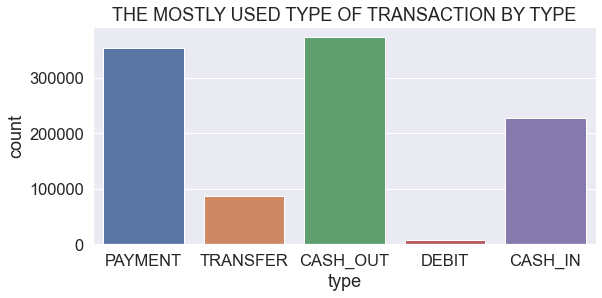

In [59]:
#the mostly used type of transaction

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(9,4))
sns.countplot(x='type',data=fd)

plt.title('THE MOSTLY USED TYPE OF TRANSACTION BY TYPE')

<AxesSubplot:title={'center':'THE TYPE OF TRANSACTION WITH HIGHEST AMOUNT IN VALUE'}, xlabel='type', ylabel='amount'>

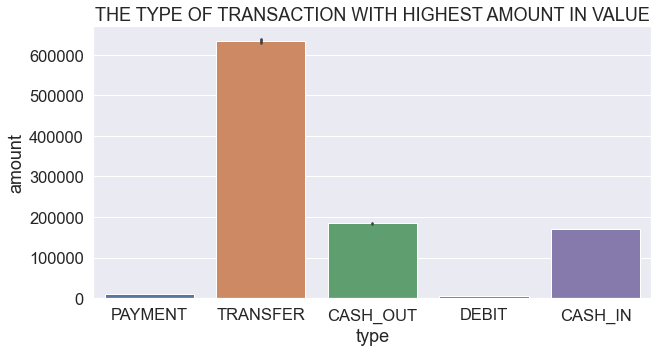

In [60]:
#the type of transaction with highest amount in value

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,5))

plt.title('THE TYPE OF TRANSACTION WITH HIGHEST AMOUNT IN VALUE')
sns.barplot(x='type',y='amount',data=fd)

In [61]:
#worked out the 5 receiver of the fraud that earned the most

fd.groupby('nameDest').newbalanceDest.sum().sort_values(ascending=False)[:5]

nameDest
C1590550415    1.853100e+09
C97730845      1.735890e+09
C803116137     1.551000e+09
C1883840933    1.460800e+09
C214774813     1.267900e+09
Name: newbalanceDest, dtype: float64

In [62]:
#used to list top 5 earner from the fraud and assigned them to a new variable name as top5_earners

top5_earners = fd.groupby('nameDest').newbalanceDest.sum().sort_values(ascending=False)[:10]

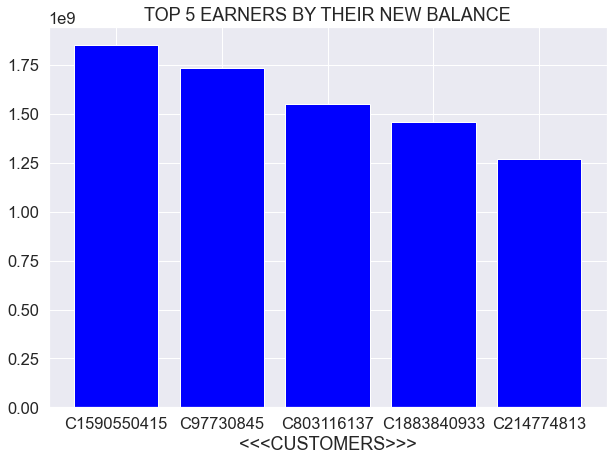

In [63]:
#used vertical plot bar to visualize top 5 earners from the fraud

barWidth = 0.5
fig = plt.subplots(figsize =(10, 7))

plt.title('TOP 5 EARNERS BY THEIR NEW BALANCE')
plt.bar(x=top5_earners.index[:5], height=top5_earners[:5], color='blue')

plt.xlabel('<<<CUSTOMERS>>>')

plt.show()

In [64]:
#calculated the online transaction with the highest amount defrauded

fd.groupby('type').newbalanceDest.sum().sort_values(ascending=False)[::]

type
CASH_OUT    6.106446e+11
CASH_IN     3.133747e+11
TRANSFER    2.346707e+11
DEBIT       9.630203e+09
PAYMENT     0.000000e+00
Name: newbalanceDest, dtype: float64

In [65]:
#assigned a new variable name "hightest_type" to the online transaction with the highest amount defrauded

highest_type = fd.groupby('type').newbalanceDest.sum().sort_values(ascending=False)[::]

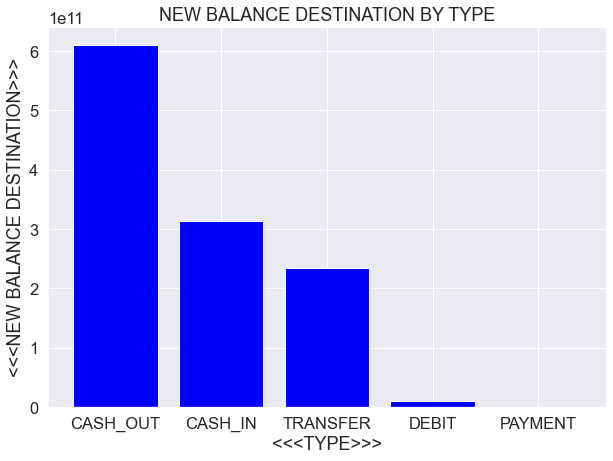

In [66]:
#used vertical bar chart to visualize highest amount received by the receiver by type

barWidth = 0.5
fig = plt.subplots(figsize =(10, 7))

plt.xlabel('<<<TYPE>>>')
plt.ylabel('<<<NEW BALANCE DESTINATION>>>')

plt.title('NEW BALANCE DESTINATION BY TYPE')
plt.bar(x=highest_type.index[:5], height=highest_type[:5],color = 'blue')

plt.show()

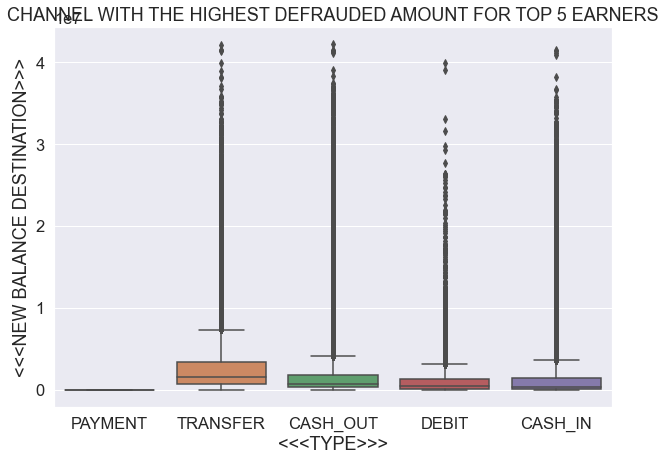

In [67]:
#use vertical boxplot to visualize highest amount defrauded by type

barWidth = 0.50
fig = plt.subplots(figsize =(10, 7))

plt.title('CHANNEL WITH THE HIGHEST DEFRAUDED AMOUNT FOR TOP 5 EARNERS')
sns.boxplot(x='type', y='newbalanceDest', data=fd)

plt.xlabel('<<<TYPE>>>')
plt.ylabel('<<<NEW BALANCE DESTINATION>>>')

plt.show()



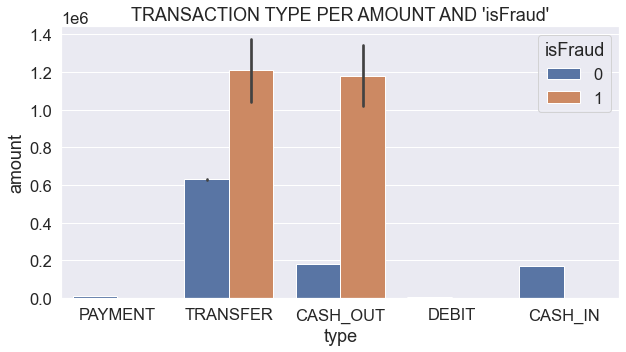

In [68]:
#checked the type of transactions that includes fraud

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,5))
sns.barplot(x='type',
                y='amount',
                 hue='isFraud',
                 data=fd,
                ).set_title("TRANSACTION TYPE PER AMOUNT AND 'isFraud'")
plt.show()